## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

 ###  <font color='red'>Loading Files </font>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ratings_train (1).csv to ratings_train (1).csv


 ### <font color='red'>Reading Files </font>

In [ ]:
import pandas as pd
data=pd.read_csv('ratings_train (1).csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [ ]:
data.shape

(89992, 3)

In [ ]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((data.rating.values, (data.user_id.values,
                                              data.item_id.values)))

In [ ]:
adjacency_matrix.shape

(943, 1681)

In [ ]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)
     

True

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


### Own code for SVD decompostion

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=10,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 10)
(10,)
(1681, 10)


<font color='red'>Compute mean of ratings</font>

In [ ]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return ratings.mean()

In [ ]:
m = m_u(data['rating'])
print(m)

3.529480398257623


In [ ]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

In [ ]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return np.zeros(dim)

In [ ]:
adjacency_matrix.shape[0],adjacency_matrix.shape[1]

(943, 1681)

In [ ]:
# give the number of dimensions for b_i (Here b_i corresponds to users)
dimen = adjacency_matrix.shape[0]   
b_i=initialize(dimen)

In [ ]:
# give the number of dimensions for c_j (Here c_j corresponds to movies)
dimen=adjacency_matrix.shape[1] 
c_j=initialize(dimen)

In [ ]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j) 

True

<font color='red'>Compute dL/db_i</font>

In [ ]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
   # total loss = loss + regularization
    total_loss=2*alpha*b_i[user_id]-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    return total_loss

In [ ]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [ ]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    derivative = alpha*2*c_j[item_id]-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))
    return derivative

In [ ]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [ ]:

from sklearn.metrics import mean_squared_error
rate=.01
y_act=data["rating"]
epochs=[]
mse=[]
for epoch in range(30):
  epochs.append(epoch+1)
  predic=[]
  for user,item,rating in zip(data['user_id'], data['item_id'],data['rating']):
    d_b=derivative_db(user,item,rating,U,VT,mu,alpha)
    b_i[user]=b_i[user]-rate*d_b 
    d_c=derivative_dc(user,item,rating,U,VT,mu,alpha)
    c_j[item]=c_j[item]-rate*d_c  
  for user,item,rating in zip(data['user_id'], data['item_id'],data['rating']):
    pred=mu+b_i[user]+c_j[item]+np.dot(U[user],VT.T[item])
    predic.append(pred)
  m= mean_squared_error(y_act,predic)
  mse.append(m) 
  print("--"+" "+ "EPOCH"+" "+str(epoch+1),"MSE :",m)  

-- EPOCH 1 MSE : 0.8884185238398319
-- EPOCH 2 MSE : 0.8618663903699963
-- EPOCH 3 MSE : 0.8522569308967981
-- EPOCH 4 MSE : 0.8476521642296475
-- EPOCH 5 MSE : 0.84507034527215
-- EPOCH 6 MSE : 0.8434572317851666
-- EPOCH 7 MSE : 0.8423648799536154
-- EPOCH 8 MSE : 0.8415781854207115
-- EPOCH 9 MSE : 0.8409840054575606
-- EPOCH 10 MSE : 0.840518321979385
-- EPOCH 11 MSE : 0.8401426267342598
-- EPOCH 12 MSE : 0.8398325085924365
-- EPOCH 13 MSE : 0.8395717755484097
-- EPOCH 14 MSE : 0.8393492588535076
-- EPOCH 15 MSE : 0.8391569908414119
-- EPOCH 16 MSE : 0.8389891208875505
-- EPOCH 17 MSE : 0.83884124529328
-- EPOCH 18 MSE : 0.8387099784247682
-- EPOCH 19 MSE : 0.8385926695081191
-- EPOCH 20 MSE : 0.8384872102468957
-- EPOCH 21 MSE : 0.8383919007700268
-- EPOCH 22 MSE : 0.8383053540695737
-- EPOCH 23 MSE : 0.8382264264719244
-- EPOCH 24 MSE : 0.8381541661184472
-- EPOCH 25 MSE : 0.8380877741628353
-- EPOCH 26 MSE : 0.8380265751166688
-- EPOCH 27 MSE : 0.8379699938883168
-- EPOCH 28 MSE

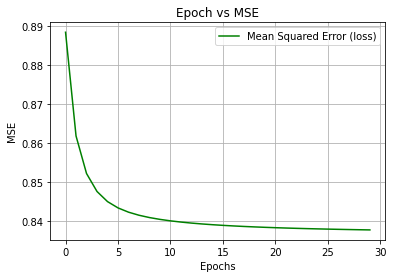

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mse,label='Mean Squared Error (loss)',color="green")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Epoch vs MSE')
plt.grid()
plt.legend()
plt.show()

# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user_info.csv.txt to user_info.csv.txt


In [ ]:
import pandas as pd
data1=pd.read_csv('user_info.csv.txt')
data1.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [ ]:
y = data1['is_male'].values
x = U

### Splitting Data into Train and Test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=10)

In [ ]:
from sklearn.linear_model import SGDClassifier
from seaborn import heatmap
clf = SGDClassifier(loss='log',random_state=23)

### Model Fitting

In [ ]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(alpha=0.0001,eta0=0.0001,max_iter=1000,loss='log',penalty='l2')
clf.fit(X_train,y_train)

SGDClassifier(eta0=0.0001, loss='log')

In [ ]:
print("Accuracy on train_data: {}".format(clf.score(X_train,y_train))) #imbalanced Dataset
print("Accuracy on test_data: {}".format(clf.score(X_test,y_test)))

Accuracy on train_data: 0.7468175388967468
Accuracy on test_data: 0.75


In [ ]:
user_male_pred = clf.predict(U)
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
 C = confusion_matrix(test_y, predict_y)

 A =(((C.T)/(C.sum(axis=1))).T)

 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))

 labels = [0,1]
 # representing A in heatmap format
 
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap='GnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Actual Class')
 plt.title("Confusion matrix")

 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap='GnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Actual Class')
 plt.title("Precision matrix")

 plt.subplot(1, 3, 3)
 # representing B in heatmap format
 sns.heatmap(A, annot=True, cmap='GnBu', fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Actual Class')
 plt.title("Recall matrix")

 plt.show()

Train confusion_matrix


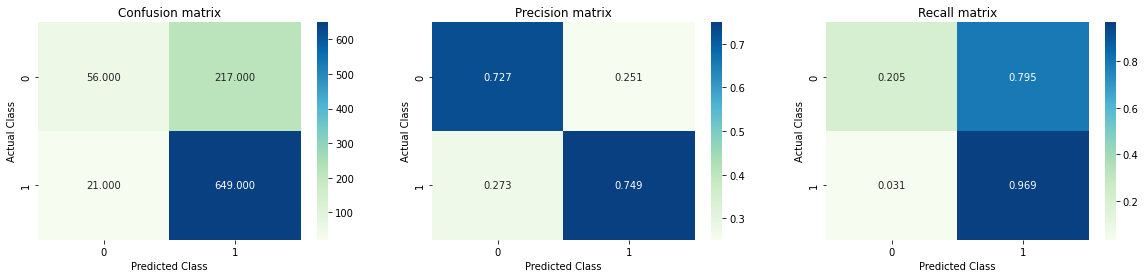

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y,user_male_pred)